## References
https://matplotlib.org/

https://medium.com/@darkprogrammerpb/agglomerative-hierarchial-clustering-from-scratch-ec50e14c3826

In [2]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# load data
df = pd.read_csv('implementation_correctness_dataset.csv', names=['feat_1', 'feat_2', 'cluster_id'], dtype={'feat_1': 'float', 'feat_2': 'float'}, skiprows=1)

# groud truth
cluster_id = df['cluster_id']
df = df.drop(['cluster_id'], axis = 1)

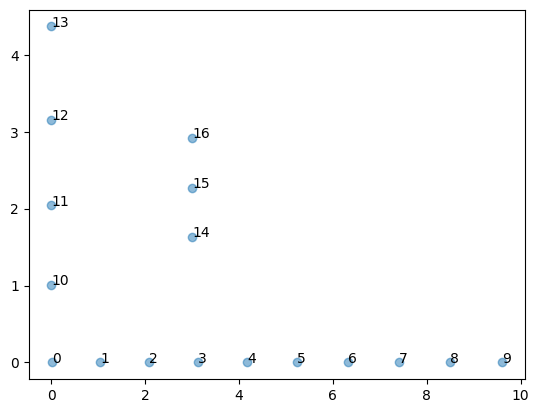

In [3]:
# scatter plot for the input data
plt.scatter(df.feat_1, df.feat_2, alpha=0.5)
for i in df.index:
    plt.annotate(i, (df.feat_1[i], df.feat_2[i]))
plt.show()

In [4]:
# make a clusters - outputs the nested array as cluster
# 1. Calculate the distance matrix using feat_1 and feat_2 as points
# 2. Choose the two points with minimum distance to form a cluster - Single linkage
# 3. Create new distance matrix with the cluster from step 2 as single point, 
#    whereas distance is minimum between correspoding point and any of the points in cluster
# 4. Repeat 2-3 until there is only one point - Heirarchical Clustering

def cal_dist_mat(df):
    dist_mat = {}
    idx = df.index
    for i in idx:
        dist_mat[i] = {}
        for j in idx:
            if i != j:
                dist_mat[i][j] = math.dist([df.feat_1[i], df.feat_2[i]], [df.feat_1[j], df.feat_2[j]])
    
    return dist_mat

# find minumum value from distance matrix and return corresponding points
def get_cluster(dist_mat):
    min_val = sys.float_info.max
    cluster = []
    for key in dist_mat.keys():
        d = dist_mat[key]
        sec_key = min(d, 
                      key=d.get)
        if min_val > dist_mat[key][sec_key]: 
            min_val = dist_mat[key][sec_key]
            cluster = [key, sec_key]
    
    return cluster

# Calculates the distance of each point from the new cluster formed in previous step.
def new_dist_mat(dist_mat, new_clus, new_clus_id):
    dist_mat[new_clus_id] = {}
    
    for i in dist_mat.keys():
        if i not in new_clus and i != new_clus_id:
            dist_mat[new_clus_id][i] = min(dist_mat[i][new_clus[0]], dist_mat[i][new_clus[1]])
            dist_mat[i][new_clus_id] = dist_mat[new_clus_id][i]
            
            # delete the distance of current point with points from new cluster
            del dist_mat[i][new_clus[0]];
            del dist_mat[i][new_clus[1]];
    
    del dist_mat[new_clus[0]]
    del dist_mat[new_clus[1]]
    
    return dist_mat
    
# Returns the linkage matrix compatible as input to "dendogram "
def create_clusters(df):
    # init linkage matrix - output of this funtion
    linkage_mat = []
    
    # init distance matrix
    dist_mat = cal_dist_mat(df);
    
    #represents the number of new clusters
    iter_cnt = 0;
    # represents the no. of leaf nodes
    row_cnt = len(df.index)
    
    # stop when there is only one cluster
    while len(dist_mat.keys()) > 1:
        local_cluster = get_cluster(dist_mat)
        
        # used in linkage matrix to show at which level two clusters merged. Represents Y coordinate in dendrogram
        level = 0
        total_pnts = 2
        
        # If two clusters are merged
        if local_cluster[0] >= row_cnt and local_cluster[1] >= row_cnt:
            level = linkage_mat[local_cluster[0] - row_cnt][2] + linkage_mat[local_cluster[1] - row_cnt][2]
            total_pnts = linkage_mat[local_cluster[0] - row_cnt][3] + linkage_mat[local_cluster[1] - row_cnt][3]
        # If one cluster and one point is merged
        elif local_cluster[0] >= row_cnt:
            level = linkage_mat[local_cluster[0] - row_cnt][2] + 1
            total_pnts = linkage_mat[local_cluster[0] - row_cnt][3] + 1
        # If one cluster and one point is merged
        elif local_cluster[1] >= row_cnt:
            level = linkage_mat[local_cluster[1] - row_cnt][2] + 1
            total_pnts = linkage_mat[local_cluster[1] - row_cnt][3] + 1
        
        # Calculates the distance between the merged clusters. Initially this is distance between two points.
        dist_bet_clust = dist_mat[local_cluster[0]][local_cluster[1]]
        # Update linkage matrix 
        linkage_mat.append([local_cluster[0], local_cluster[1], dist_bet_clust, total_pnts])

        # Update distance matrix
        dist_mat = new_dist_mat(dist_mat, local_cluster, row_cnt + iter_cnt)
        iter_cnt = iter_cnt + 1
    
    return linkage_mat
    
linkage_mat = create_clusters(df)

# Print the clusters
print(linkage_mat)    

[[14, 15, 0.6394811713050599, 2], [16, 17, 0.6541600976683699, 3], [0, 10, 1.0051989852760497, 2], [1, 19, 1.025, 3], [2, 20, 1.0350000000000001, 4], [11, 21, 1.0378709385014502, 5], [3, 22, 1.045, 6], [4, 23, 1.0549999999999997, 7], [5, 24, 1.0650000000000004, 8], [6, 25, 1.0750000000000002, 9], [7, 26, 1.085, 10], [8, 27, 1.0949999999999998, 11], [9, 28, 1.1050000000000004, 12], [12, 29, 1.1078056899931301, 13], [13, 30, 1.2169068451044702, 14], [18, 31, 1.6342501980753847, 17]]


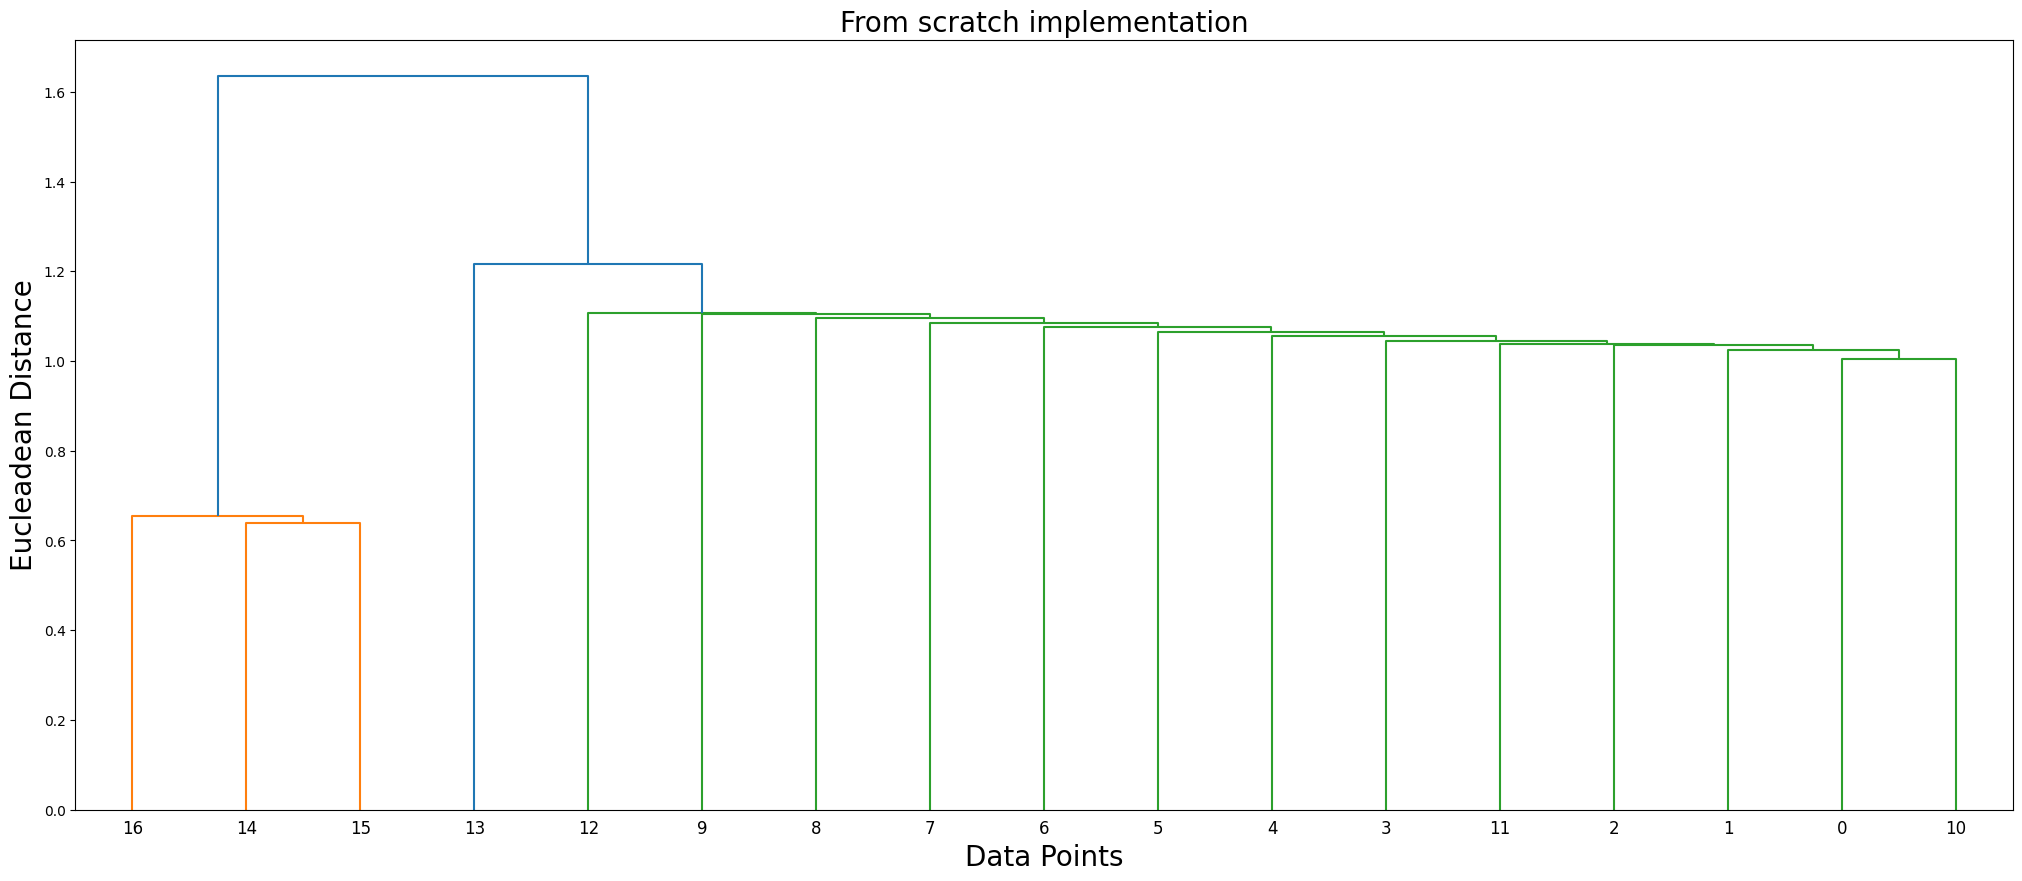

In [5]:
# Plot the dendogram - my implementation of single linkage agglomerative clustering 
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_mat)
plt.xlabel("Data Points", fontdict={'size':'20'})
plt.ylabel("Eucleadean Distance", fontdict={'size':'20'})
plt.title("From scratch implementation", fontdict={'size':'20'})
plt.show()


[[14.         15.          0.63948117  2.        ]
 [16.         17.          0.6541601   3.        ]
 [ 0.         10.          1.00519899  2.        ]
 [ 1.         19.          1.025       3.        ]
 [ 2.         20.          1.035       4.        ]
 [11.         21.          1.03787094  5.        ]
 [ 3.         22.          1.045       6.        ]
 [ 4.         23.          1.055       7.        ]
 [ 5.         24.          1.065       8.        ]
 [ 6.         25.          1.075       9.        ]
 [ 7.         26.          1.085      10.        ]
 [ 8.         27.          1.095      11.        ]
 [ 9.         28.          1.105      12.        ]
 [12.         29.          1.10780569 13.        ]
 [13.         30.          1.21690685 14.        ]
 [18.         31.          1.6342502  17.        ]]


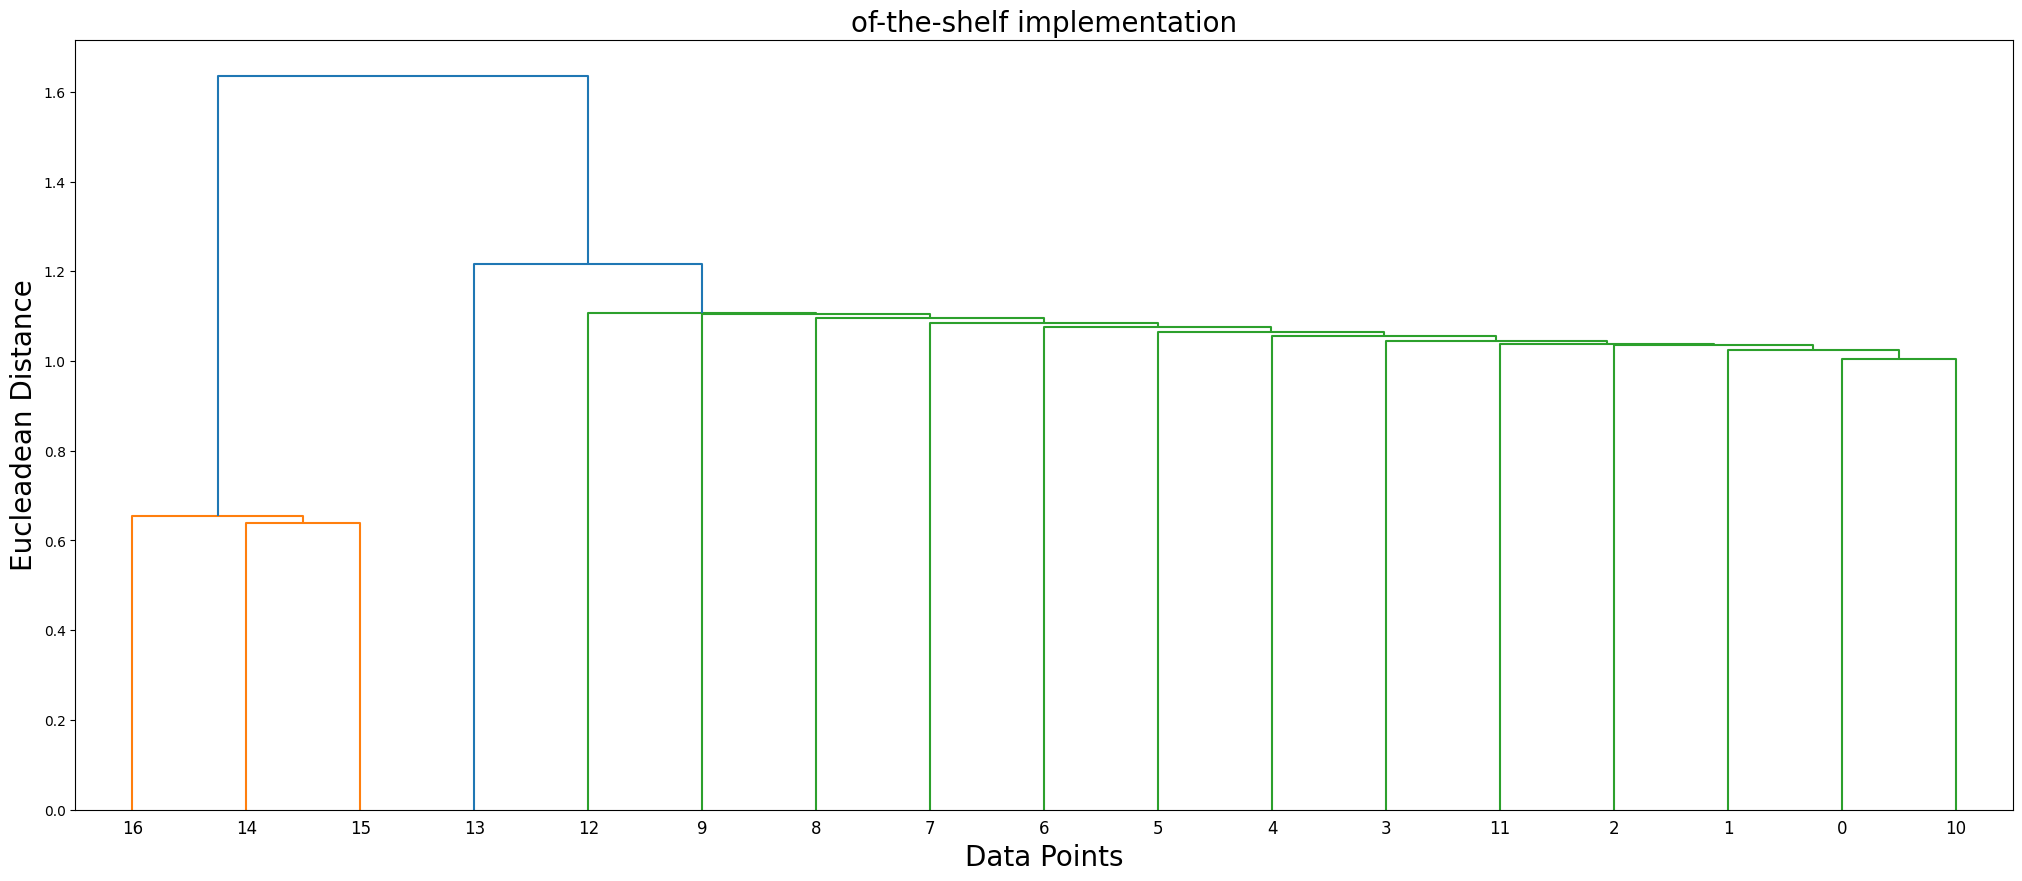

In [6]:
# Of-the-shelf single linkage agglmorative clustering
X = df
Z = linkage(X, 'single')
print(Z)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.xlabel("Data Points", fontdict={'size':'20'})
plt.ylabel("Eucleadean Distance", fontdict={'size':'20'})
plt.title("of-the-shelf implementation", fontdict={'size':'20'})
plt.show()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn import metrics
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

df = pd.read_csv('data.csv').fillna(0.0)
dff = df.drop(['id', 'Unnamed: 32'], axis=1)
dff['diagnosis'] = dff.diagnosis.map(lambda x: 0 if x == 'B' else 1)
val = dff.drop(['diagnosis'], axis=1)
#val = StandardScaler().fit_transform(val)

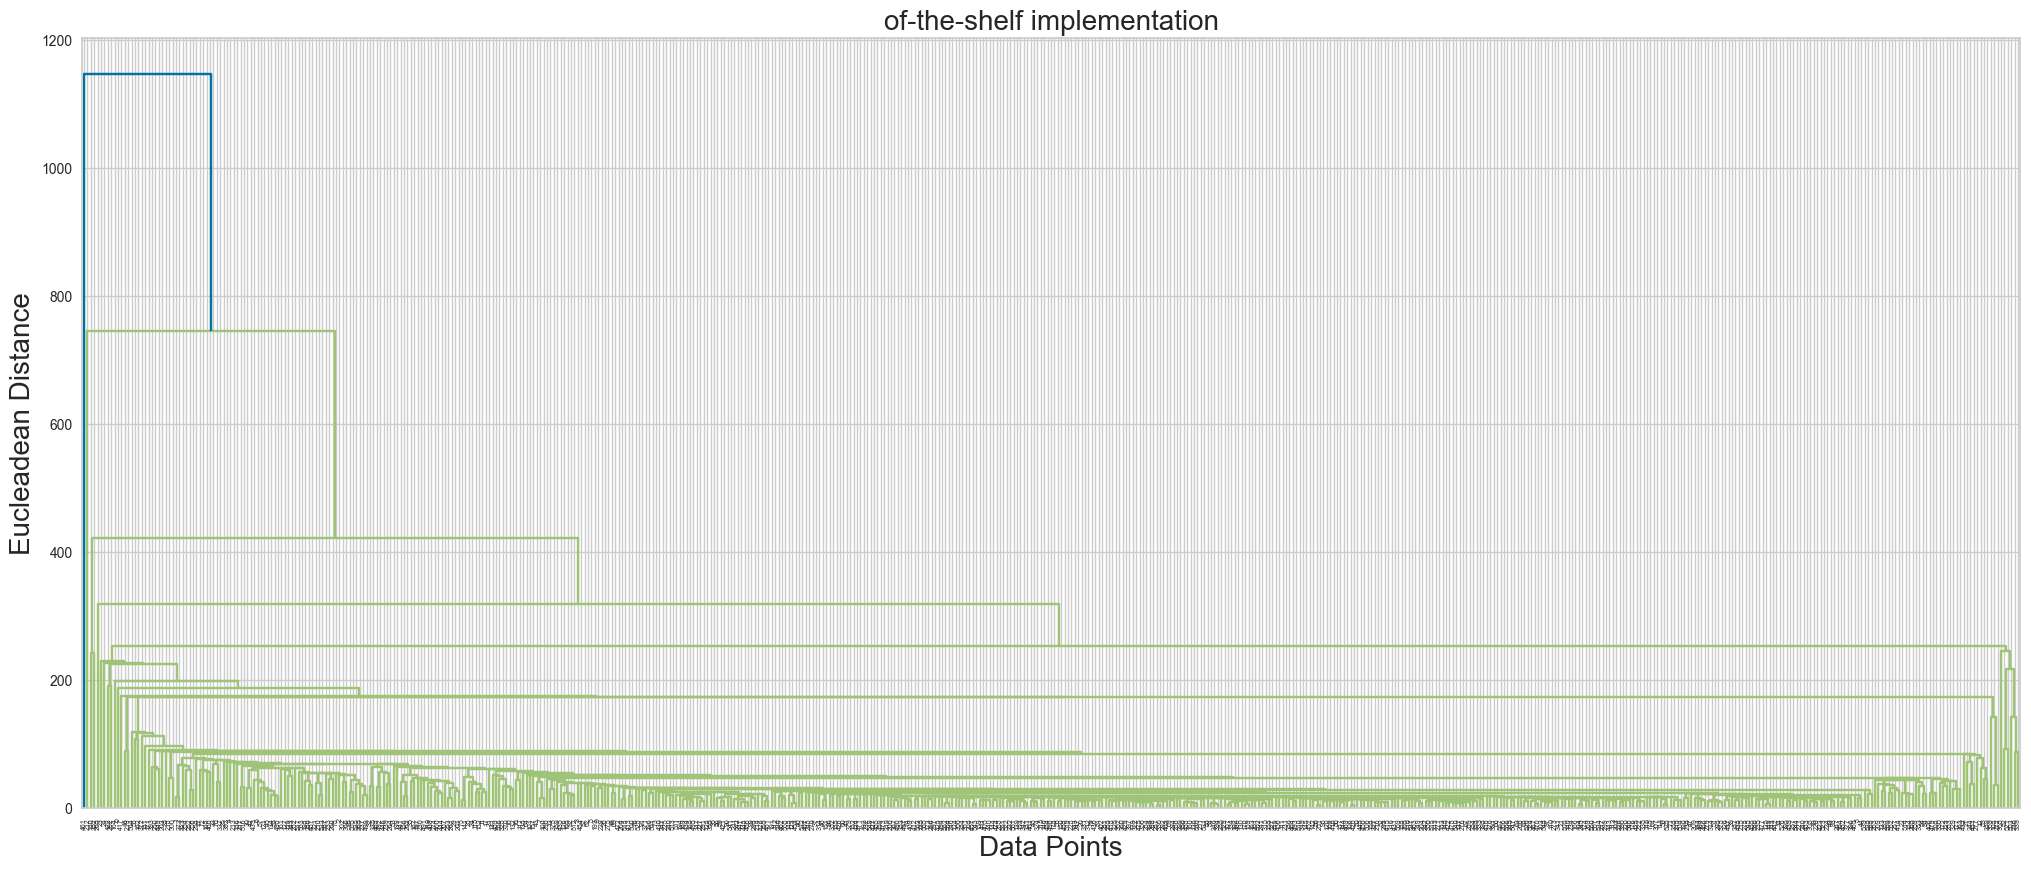

In [8]:
# Of-the-shelf single linkage agglmorative clustering
X = val
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.xlabel("Data Points", fontdict={'size':'20'})
plt.ylabel("Eucleadean Distance", fontdict={'size':'20'})
plt.title("of-the-shelf implementation", fontdict={'size':'20'})
plt.show()

In [7]:
import numpy as np
print("Number of clusters=")
len(np.unique(dn['color_list']))

Number of clusters=


3